In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train=pd.read_csv('train.csv')

In [3]:
df_test=pd.read_csv('test.csv')

In [4]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# Data Cleaning
    1.handle the NAN value.
    2. Error
    3. Duplicates.
    4.Outliers
    

In [7]:
df=df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
df.shape

(783667, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### handle the NAN value

In [11]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [12]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [13]:
df['Product_Category_2'].mode()[0]

8.0

In [14]:
df['Product_Category_2']=df['Product_Category_2'].fillna(method='bfill')

In [15]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [16]:
df['Product_Category_3']=df['Product_Category_3'].fillna(method='ffill')
df['Product_Category_3']

0          NaN
1         14.0
2         14.0
3         14.0
4         14.0
          ... 
233594    15.0
233595    15.0
233596    12.0
233597    12.0
233598    12.0
Name: Product_Category_3, Length: 783667, dtype: float64

In [35]:
df['Product_Category_3']=df['Product_Category_3'].fillna(method='bfill')
df['Product_Category_3']

0         14.0
1         14.0
2         14.0
3         14.0
4         14.0
          ... 
233594    15.0
233595    15.0
233596    12.0
233597    12.0
233598    12.0
Name: Product_Category_3, Length: 783667, dtype: float64

In [17]:
df['Product_Category_3'].value_counts()

16.0    152302
15.0    122110
14.0     91716
17.0     79552
5.0      78439
8.0      60295
9.0      52439
12.0     43986
13.0     26216
18.0     22332
6.0      22083
11.0     12495
4.0       8809
10.0      8280
3.0       2612
Name: Product_Category_3, dtype: int64

In [18]:
df.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
233594    False
233595    False
233596    False
233597    False
233598    False
Length: 783667, dtype: bool

## Outlier

In [19]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,783667.000000,783666.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.924173,12.655681,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.028587,4.116690,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


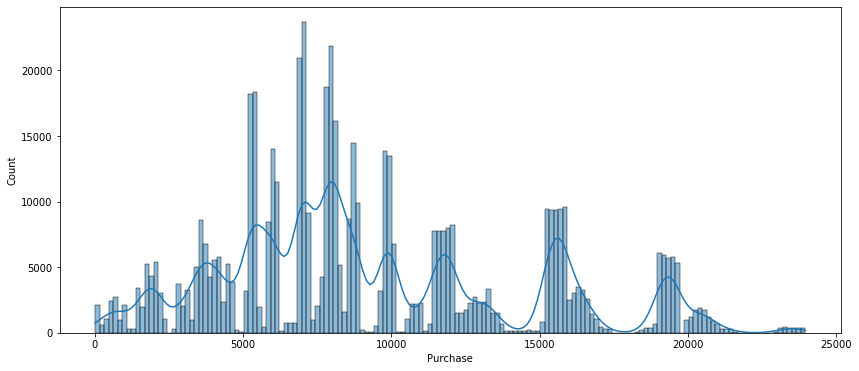

In [20]:
plt.rcParams['figure.figsize']=(14,6)
sns.histplot(df['Purchase'],kde=True)

In [21]:
mean_v=df['Purchase'].mean()
mean_v

9263.968712959126

In [22]:
std_v=df['Purchase'].std()
std_v

5023.065393820627

In [23]:
n=mean_v-(1*std_v)

In [24]:
p=mean_v+(1*std_v)

In [25]:
df[df['Purchase']>p]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,14.0,15227.0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,17.0,15854.0
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,17.0,15686.0
...,...,...,...,...,...,...,...,...,...,...,...,...
545864,1006036,P00111042,F,26-35,15,B,4+,1,15,16.0,15.0,21390.0
545865,1006036,P00152142,F,26-35,15,B,4+,1,7,16.0,15.0,16586.0
545882,1006036,P00270542,F,26-35,15,B,4+,1,1,6.0,8.0,15653.0
545904,1006040,P00081142,M,26-35,6,B,2,0,6,8.0,14.0,16493.0


In [26]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,6.0,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,14.0,14.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,2.0,14.0,7969.0


# Encoding

In [27]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [28]:
city_cate=pd.get_dummies(data=df['City_Category'],drop_first=True)

In [29]:
df=pd.concat([df,city_cate],axis=1)

In [30]:
df.drop(['City_Category'],axis=1,inplace=True)

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [32]:
df['Gender']=le.fit_transform(df['Gender'])

In [39]:
for i in df[['Age','Occupation','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']].columns:
    df[i]=le.fit_transform(df[i])

In [40]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,2,4,10,8370.0,0,0
1,0,0,10,2,0,0,4,10,15200.0,0,0
2,0,0,10,2,0,11,12,10,1422.0,0,0
3,0,0,10,2,0,11,12,10,1057.0,0,0
4,1,6,16,4,0,7,0,10,7969.0,0,1


In [41]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

# Train Test splite

In [67]:
test=df[df['Purchase'].isnull()]
train=df[~df['Purchase'].isnull()]

In [68]:
train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,2,4,10,8370.0,0,0
1,0,0,10,2,0,0,4,10,15200.0,0,0
2,0,0,10,2,0,11,12,10,1422.0,0,0
3,0,0,10,2,0,11,12,10,1057.0,0,0
4,1,6,16,4,0,7,0,10,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,19,9,7,368.0,1,0
550064,0,2,1,3,0,19,9,7,371.0,0,1
550065,0,2,15,4,1,19,9,7,137.0,1,0
550066,0,6,1,2,0,19,9,7,365.0,0,1


In [69]:
test.drop(['Purchase'],axis=1,inplace=True)

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [70]:
test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1,4,7,2,1,0,9,7,1,0
1,1,2,17,0,0,2,3,7,0,1
2,0,3,1,4,1,4,12,7,1,0
3,0,3,1,4,1,3,7,7,1,0
4,0,2,1,1,0,3,3,8,0,1
